<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r8-unbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [2]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-3-r8.csv?token=AKVFSOHNWQBLFB5RERTWCD26ZMFPI')
print(df.shape)
df

(44155, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,96,0,3,1,1,4,3,9,3,3,24,8,3,5,5,1.0,24,1,1,1,1,1,0,1,4,12,3,27,9,1
1,118,0,3,1,1,4,3,9,0,0,24,8,4,2,2,1.0,12,11,1,11,11,121,0,1,4,16,3,27,9,1
2,134,2,0,4,1,1,5,17,24,8,3,3,3,5,0,0.0,4,10,2,11,20,220,0,4,4,12,20,85,100,1
3,135,2,0,4,2,2,5,17,24,8,3,3,3,5,0,0.0,5,9,3,11,27,297,0,8,16,48,20,85,100,1
4,136,2,0,4,3,2,5,17,24,8,3,3,3,5,0,0.0,6,8,4,11,32,352,0,12,24,72,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44150,3267901,2,0,4,1,1,5,19,24,8,3,3,20033,5,0,0.0,5,5,2,6,10,60,0,4,4,80132,20,95,100,1
44151,3267902,2,0,4,2,2,5,19,24,8,3,3,20033,5,0,0.0,6,4,3,6,12,72,0,8,16,320528,20,95,100,1
44152,3267903,2,0,4,3,2,5,19,24,8,3,3,20033,5,0,0.0,7,3,4,6,12,72,0,12,24,480792,20,95,100,1
44153,3267904,2,0,4,4,2,5,19,24,8,3,3,20033,5,0,0.0,8,2,5,6,10,60,0,16,32,641056,20,95,100,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-1-r8.csv?token=AKVFSOCCRVMWCBDFYTFB5BK6ZMFQ2')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-6-r8.csv?token=AKVFSOBLJMRQZCMFRUTCBZC6ZMFQ6')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-9-r8.csv?token=AKVFSOBGRCA74DHKHRXKOHC6ZMFRC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-14-r8.csv?token=AKVFSOCZJJ77NL3M67VJK726ZMFRE')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-5-r8.csv?token=AKVFSOEOK6RYMTSXOKANGZ26ZMFUI')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-12-r8.csv?token=AKVFSOHJ2WJTZLJK74V73IK6ZMFUK')
#df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-15-r8.csv?token=AKVFSOFE5GCKVHG6PLVJZUK6ZMFUO')

In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
#print(df13.shape)

(62468, 30)
(62468, 30)
(65692, 30)
(64008, 30)
(44430, 30)
(69718, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
#df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [8]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,93,0,3,1,1,4,3,9,5,5,24,8,3,2,2,1.0,13,1,1,1,1,1,0,1,4,12,3,27,9,1
1,96,0,3,1,1,4,3,9,3,3,24,8,3,5,5,1.0,24,1,1,1,1,1,0,1,4,12,3,27,9,1
2,96,0,3,1,1,4,3,9,3,3,24,8,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9,0
3,96,0,3,1,1,4,3,9,3,3,24,8,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9,0
4,96,0,3,1,1,4,3,9,3,3,24,8,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412934,3272481,2,0,4,2,2,5,20,24,8,3,3,30093,5,0,0.0,5,1,1,1,1,1,0,8,16,481488,20,100,100,0
412935,3272482,2,0,3,1,4,3,11,24,8,27,11,30093,3,0,0.0,6,1,1,1,1,1,0,3,12,361116,9,33,27,0
412936,3272483,2,0,4,3,2,5,20,24,8,3,3,30093,5,0,0.0,7,1,1,1,1,1,0,12,24,722232,20,100,100,0
412937,3272484,2,0,4,4,2,5,20,24,8,3,3,30093,5,0,0.0,8,1,1,1,1,1,0,16,32,962976,20,100,100,0


In [9]:
df.shape

(412939, 30)

Test Data

In [10]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-2-r8.csv?token=AKVFSOBR73XGR23NLW7V4FK6ZMFXS')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-5-r8.csv?token=AKVFSODPC3JODZJSJN7QNIK6ZMFXM')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-10-r8.csv?token=AKVFSOAKOD7VNHP6RSW4W6K6ZMFXW')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-12-r8.csv?token=AKVFSODVWB6GBNV7ZHNOFHK6ZMFX2')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-13-r8.csv?token=AKVFSOENFZHL4ATYOOLLPVC6ZMFX6')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-15-r8.csv?token=AKVFSOCW4ZLXIZ627I3BKG26ZMFYA')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-10-r8.csv?token=AKVFSOGVNHJOWAI33IVYATS6ZMF6I')

print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(62468, 30)
(62204, 30)
(65699, 30)
(88032, 30)
(64259, 30)
(64224, 30)
(48017, 30)


In [11]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,96,0,3,1,1,4,3,9,3,3,24,8,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9,0
1,118,0,3,1,1,4,3,9,2,2,24,8,5,4,4,1.0,20,17,1,17,17,289,0,1,4,20,3,27,9,0
2,134,2,0,4,1,1,5,17,24,8,3,3,4,5,0,0.0,4,16,2,17,32,544,0,4,4,16,20,85,100,0
3,135,2,0,4,2,2,5,17,24,8,3,3,4,5,0,0.0,5,15,3,17,45,765,0,8,16,64,20,85,100,0
4,136,2,0,4,3,2,5,17,24,8,3,3,4,5,0,0.0,6,14,4,17,56,952,0,12,24,96,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62463,3269423,2,0,4,2,2,5,19,24,8,3,3,30056,5,0,0.0,5,5,2,6,10,60,0,8,16,480896,20,95,100,0
62464,3269424,2,0,4,3,2,5,19,24,8,3,3,30056,5,0,0.0,6,4,3,6,12,72,0,12,24,721344,20,95,100,0
62465,3269425,2,0,4,4,2,5,19,24,8,3,3,30056,5,0,0.0,7,3,4,6,12,72,0,16,32,961792,20,95,100,0
62466,3269426,2,0,3,1,4,3,10,24,8,27,11,30056,3,0,0.0,8,2,5,6,10,60,0,3,12,360672,9,30,27,0


In [12]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [14]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.420471,-0.269254,-0.016420,0.025582,0.673046,0.672910,-0.037582,0.413981,-0.227162,-0.589429,-0.519220,-0.140243,0.097969,-0.026935,-0.033676,-0.040219,0.489326,-0.216945,-0.145925,-0.128423,0.355919,0.674010,0.617278,0.011920
inport,-0.420471,1.000000,0.087392,-0.018310,0.028545,-0.406371,-0.512160,-0.012175,0.276157,0.813529,0.874895,0.649321,0.011659,-0.214567,-0.129285,-0.123518,-0.102611,0.417396,0.057315,0.041025,0.024198,-0.283146,-0.469967,-0.403757,0.095468
cache_coherence_type,-0.269254,0.087392,1.000000,0.163940,-0.255504,-0.382716,-0.398183,0.036241,-0.180535,0.073424,0.191671,0.007468,0.059139,-0.085092,-0.016536,-0.006026,0.005004,-0.056577,0.439450,0.364695,0.282059,0.566458,-0.389935,-0.001144,-0.004803
flit_id,-0.016420,-0.018310,0.163940,1.000000,0.046061,0.206130,0.171906,0.002478,-0.020250,-0.033357,-0.026093,0.304971,-0.058615,0.101408,0.027266,0.003333,0.003044,-0.017759,0.932177,0.889879,0.636283,0.332700,0.192084,0.290842,0.000500
flit_type,0.025582,0.028545,-0.255504,0.046061,1.000000,-0.321271,-0.267935,-0.003868,0.031564,0.051996,0.040675,0.324735,-0.041104,0.068074,0.017184,0.011847,0.009349,0.027683,-0.001560,0.261397,0.182866,-0.518531,-0.299382,-0.453297,-0.000789
vnet,0.673046,-0.406371,-0.382716,0.206130,-0.321271,1.000000,0.972993,-0.071490,0.309961,-0.299069,-0.553463,-0.531151,-0.112950,0.124782,0.007539,-0.009055,-0.019968,0.212923,-0.050991,-0.082863,-0.100345,0.544557,0.990449,0.924303,0.087863
vc,0.672910,-0.512160,-0.398183,0.171906,-0.267935,0.972993,1.000000,-0.061606,0.241069,-0.401208,-0.647537,-0.573054,-0.101488,0.157355,0.035596,0.020882,0.006590,0.127228,-0.082435,-0.100432,-0.108005,0.506425,0.994651,0.888681,0.065701
traversal_id,-0.037582,-0.012175,0.036241,0.002478,-0.003868,-0.071490,-0.061606,1.000000,0.014532,0.015419,0.011771,0.052906,0.131206,0.131256,0.167230,0.126559,0.100339,-0.043634,0.022419,0.016357,0.551349,-0.030869,-0.065443,-0.062410,-0.320397
hop_count,0.413981,0.276157,-0.180535,-0.020250,0.031564,0.309961,0.241069,0.014532,1.000000,0.568909,0.123018,0.095856,-0.083705,-0.043610,-0.081120,-0.086211,-0.078842,0.559045,-0.141890,-0.096111,-0.064163,0.112589,0.271960,0.260924,-0.043758
current_hop,-0.227162,0.813529,0.073424,-0.033357,0.051996,-0.299069,-0.401208,0.015419,0.568909,1.000000,0.770920,0.648843,0.004207,-0.190802,-0.118891,-0.114229,-0.095459,0.482771,0.020071,0.020878,0.024491,-0.200114,-0.360762,-0.293383,0.034406


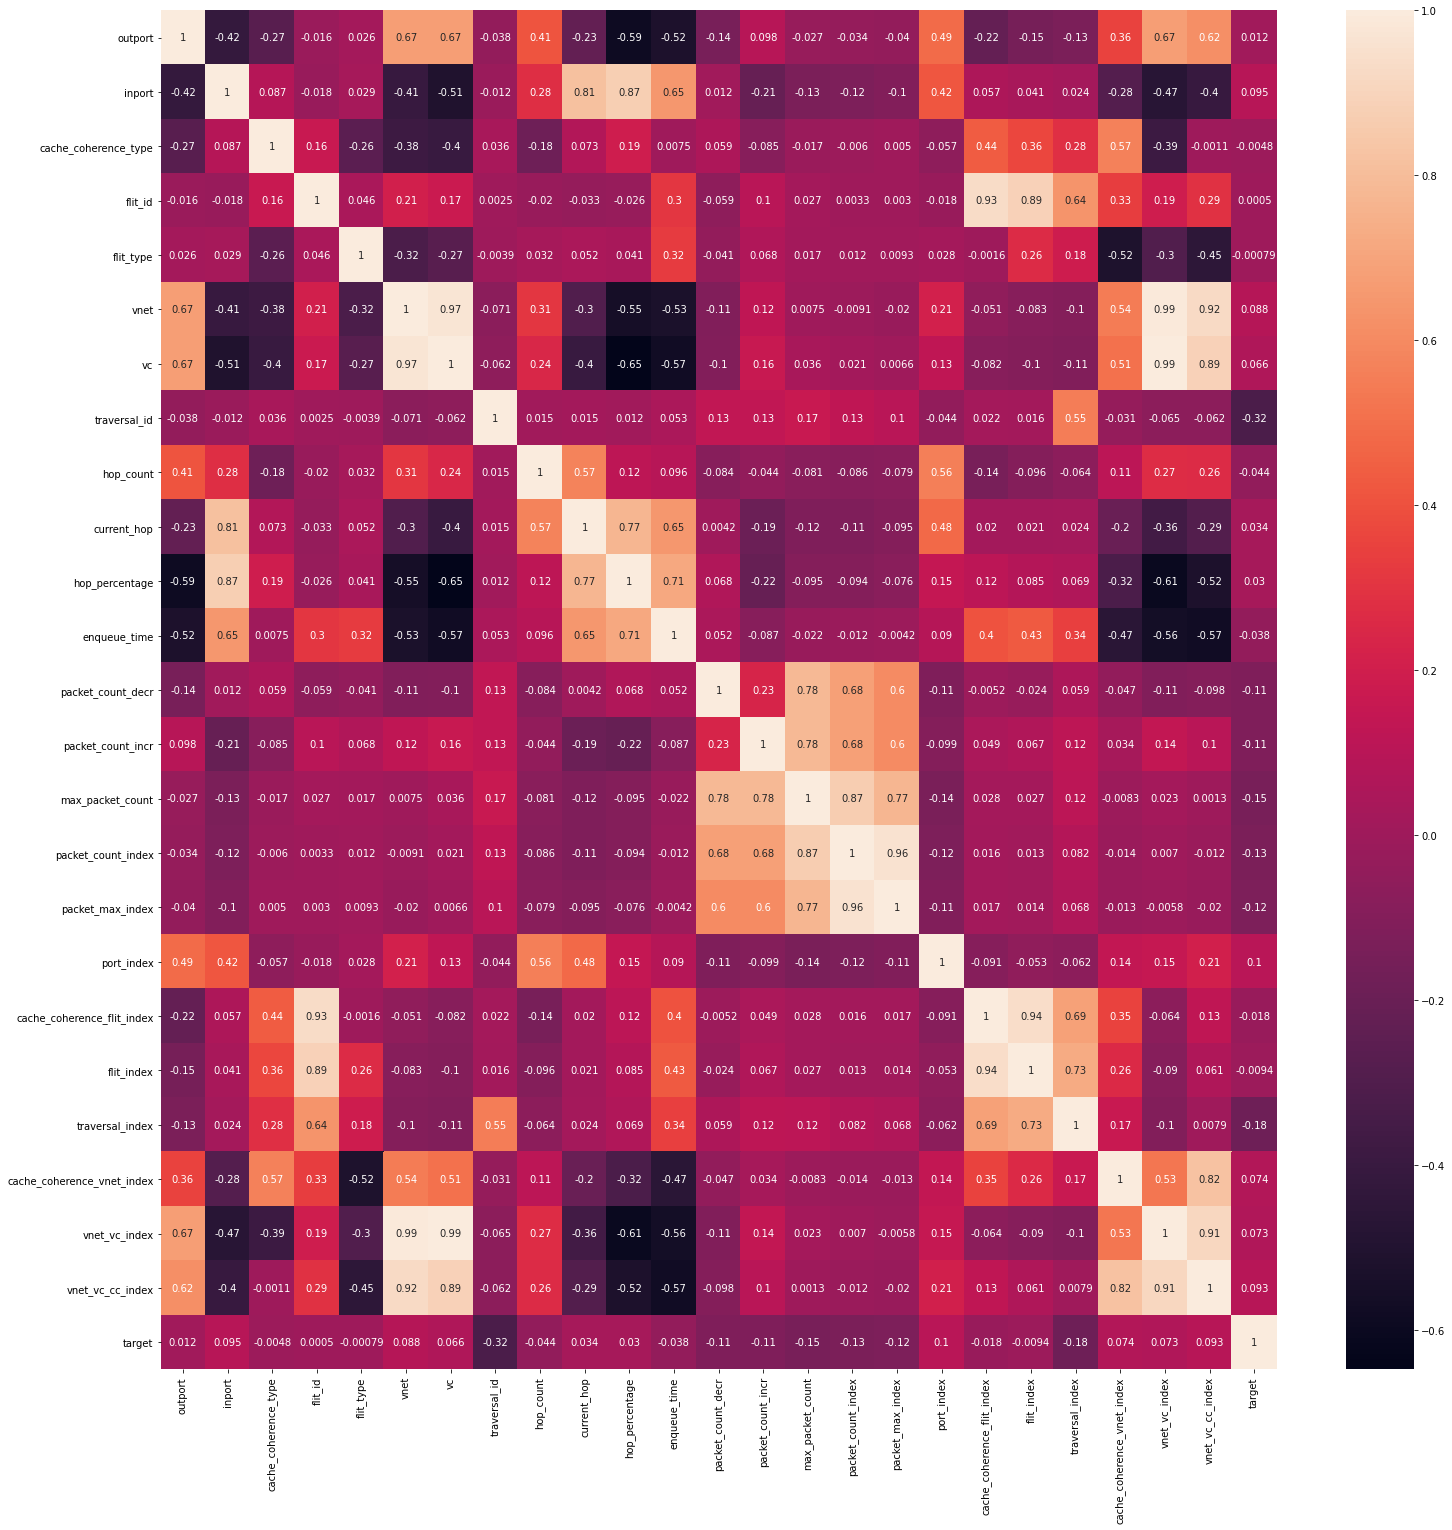

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [16]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,1,1,4,3,9,3,2,2,1.0,13,1,1,1,1,1,0,1,4,12,3,27,9
1,0,3,1,1,4,3,9,3,5,5,1.0,24,1,1,1,1,1,0,1,4,12,3,27,9
2,0,3,1,1,4,3,9,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9
3,0,3,1,1,4,3,9,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9
4,0,3,1,1,4,3,9,4,5,5,1.0,24,1,1,1,1,1,0,1,4,16,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412934,2,0,4,2,2,5,20,30093,5,0,0.0,5,1,1,1,1,1,0,8,16,481488,20,100,100
412935,2,0,3,1,4,3,11,30093,3,0,0.0,6,1,1,1,1,1,0,3,12,361116,9,33,27
412936,2,0,4,3,2,5,20,30093,5,0,0.0,7,1,1,1,1,1,0,12,24,722232,20,100,100
412937,2,0,4,4,2,5,20,30093,5,0,0.0,8,1,1,1,1,1,0,16,32,962976,20,100,100


In [17]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.333333,0.4,1.0,0.123288,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.833333,1.0,1.0,0.273973,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.833333,1.0,1.0,0.273973,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
3,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.833333,1.0,1.0,0.273973,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
4,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.833333,1.0,1.0,0.273973,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412934,0.666667,0.0,0.500000,0.25,0.333333,1.0,1.000000,1.000000,0.833333,0.0,0.0,0.013699,0.0,0.0,0.0,0.0,0.0,0.0,0.241379,0.139535,0.177781,0.944444,1.000000,1.000000
412935,0.666667,0.0,0.333333,0.00,1.000000,0.0,0.181818,1.000000,0.500000,0.0,0.0,0.027397,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133335,0.333333,0.082192,0.197802
412936,0.666667,0.0,0.500000,0.50,0.333333,1.0,1.000000,1.000000,0.833333,0.0,0.0,0.041096,0.0,0.0,0.0,0.0,0.0,0.0,0.379310,0.232558,0.266673,0.944444,1.000000,1.000000
412937,0.666667,0.0,0.500000,0.75,0.333333,1.0,1.000000,1.000000,0.833333,0.0,0.0,0.054795,0.0,0.0,0.0,0.0,0.0,0.0,0.517241,0.325581,0.355565,0.944444,1.000000,1.000000


In [18]:
train_X[train_X.duplicated()].shape

(7329, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [20]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.833333,1.0,1.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.666667,0.8,1.0,0.246154,0.484848,0.000000,0.484848,0.052459,0.027684,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.666667,0.0,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.000000,0.454545,0.030303,0.484848,0.101639,0.052196,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
3,0.666667,0.0,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.015385,0.424242,0.060606,0.484848,0.144262,0.073440,0.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.000000
4,0.666667,0.0,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.030769,0.393939,0.090909,0.484848,0.180328,0.091416,0.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62463,0.666667,0.0,0.500000,0.25,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.015385,0.121212,0.030303,0.151515,0.029508,0.005671,0.0,0.241379,0.139535,0.177779,0.944444,0.931507,1.000000
62464,0.666667,0.0,0.500000,0.50,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.030769,0.090909,0.060606,0.151515,0.036066,0.006825,0.0,0.379310,0.232558,0.266671,0.944444,0.931507,1.000000
62465,0.666667,0.0,0.500000,0.75,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.046154,0.060606,0.090909,0.151515,0.036066,0.006825,0.0,0.517241,0.325581,0.355564,0.944444,0.931507,1.000000
62466,0.666667,0.0,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.500000,0.0,0.0,0.061538,0.030303,0.121212,0.151515,0.029508,0.005671,0.0,0.068966,0.093023,0.133333,0.333333,0.041096,0.197802


In [21]:
test_X[test_X.duplicated()].shape

(76, 24)

In [22]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(57, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.833333,1.0,1.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.333333,0.4,1.0,0.128571,0.457143,0.000000,0.457143,0.046921,0.023394,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.666667,0.0,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.000000,0.428571,0.028571,0.457143,0.090909,0.044107,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
3,0.666667,0.0,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.014286,0.400000,0.057143,0.457143,0.129032,0.062058,0.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.000000
4,0.666667,0.0,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.028571,0.371429,0.085714,0.457143,0.161290,0.077248,0.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62199,0.666667,0.0,0.500000,0.25,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.014286,0.114286,0.200000,0.314286,0.114370,0.038908,0.0,0.241379,0.139535,0.177779,0.944444,0.931507,1.000000
62200,0.666667,0.0,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.500000,0.0,0.0,0.028571,0.085714,0.228571,0.314286,0.102639,0.035009,0.0,0.068966,0.093023,0.133333,0.333333,0.041096,0.197802
62201,0.666667,0.0,0.500000,0.50,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.042857,0.057143,0.257143,0.314286,0.085044,0.029161,0.0,0.379310,0.232558,0.266671,0.944444,0.931507,1.000000
62202,0.666667,0.0,0.500000,0.75,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.057143,0.028571,0.285714,0.314286,0.061584,0.021363,0.0,0.517241,0.325581,0.355564,0.944444,0.931507,1.000000


In [23]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(101, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.833333,1.0,1.0,0.294118,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.333333,0.4,1.0,0.117647,0.470588,0.000000,0.470588,0.049536,0.025399,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.666667,0.000000,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.000000,0.441176,0.029412,0.470588,0.095975,0.047888,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
3,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.014706,0.411765,0.058824,0.470588,0.136223,0.067378,0.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.000000
4,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.029412,0.382353,0.088235,0.470588,0.170279,0.083870,0.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65694,0.000000,0.666667,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.500000,0.6,1.0,0.382353,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.586207,0.372093,0.399996,0.833333,0.000000,0.494505
65695,0.000000,0.666667,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.500000,0.6,1.0,0.485294,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.494505
65696,0.000000,0.666667,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.500000,0.6,1.0,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
65697,0.000000,0.666667,0.166667,0.00,1.000000,0.0,0.090909,1.000000,0.500000,0.6,1.0,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088886,0.166667,0.041096,0.098901


In [24]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(41, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.833333,1.0,1.00,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.333333,1.0,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.8,0.80,0.246154,0.617647,0.000000,0.617647,0.065015,0.042596,0.5,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,0.333333,1.0,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.8,0.80,0.261538,0.588235,0.029412,0.617647,0.126935,0.081400,0.5,0.241379,0.139535,0.000013,0.944444,0.794521,1.000000
3,0.333333,1.0,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.8,0.80,0.276923,0.558824,0.058824,0.617647,0.182663,0.116324,0.5,0.379310,0.232558,0.000022,0.944444,0.794521,1.000000
4,0.333333,1.0,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.833333,0.8,0.80,0.292308,0.529412,0.088235,0.617647,0.232198,0.147367,0.5,0.517241,0.325581,0.000031,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88027,0.333333,1.0,0.5,0.25,0.333333,1.0,0.727273,0.999967,0.333333,0.2,0.50,0.092308,0.088235,0.029412,0.117647,0.021672,0.003439,0.5,0.241379,0.139535,0.177839,0.944444,0.794521,1.000000
88028,0.333333,1.0,0.5,0.50,0.333333,1.0,0.727273,0.999967,0.333333,0.2,0.50,0.107692,0.058824,0.058824,0.117647,0.024768,0.003880,0.5,0.379310,0.232558,0.266761,0.944444,0.794521,1.000000
88029,0.333333,1.0,0.5,0.75,0.333333,1.0,0.727273,0.999967,0.333333,0.2,0.50,0.123077,0.029412,0.088235,0.117647,0.021672,0.003439,0.5,0.517241,0.325581,0.355683,0.944444,0.794521,1.000000
88030,0.333333,1.0,0.5,1.00,0.666667,1.0,0.727273,0.999967,0.333333,0.2,0.50,0.184615,0.000000,0.117647,0.117647,0.012384,0.002117,0.5,0.655172,0.651163,0.666909,0.944444,0.794521,1.000000


In [25]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(55, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.833333,1.0,1.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.333333,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.333333,0.4,1.0,0.123077,0.432432,0.000000,0.432432,0.042216,0.019946,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.666667,0.000000,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.000000,0.405405,0.027027,0.432432,0.081794,0.037606,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
3,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.015385,0.378378,0.054054,0.432432,0.116095,0.052912,0.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.000000
4,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.030769,0.351351,0.081081,0.432432,0.145119,0.065863,0.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64254,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.015385,0.108108,0.081081,0.189189,0.050132,0.011012,0.0,0.241379,0.139535,0.177785,0.944444,0.931507,1.000000
64255,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.030769,0.081081,0.108108,0.189189,0.050132,0.011012,0.0,0.379310,0.232558,0.266680,0.944444,0.931507,1.000000
64256,0.666667,0.000000,0.500000,0.75,0.333333,1.0,0.909091,1.000000,0.833333,0.0,0.0,0.046154,0.054054,0.135135,0.189189,0.044855,0.009904,0.0,0.517241,0.325581,0.355575,0.944444,0.931507,1.000000
64257,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.500000,0.0,0.0,0.061538,0.027027,0.162162,0.189189,0.034301,0.007688,0.0,0.068966,0.093023,0.133337,0.333333,0.041096,0.197802


In [26]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(97, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.000000,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.833333,1.0,1.0,0.294118,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.333333,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.666667,0.8,1.0,0.235294,0.470588,0.000000,0.470588,0.049536,0.025399,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.0
2,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.000000,0.441176,0.029412,0.470588,0.095975,0.047888,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
3,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.014706,0.411765,0.058824,0.470588,0.136223,0.067378,0.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.0
4,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.0,0.0,0.029412,0.382353,0.088235,0.470588,0.170279,0.083870,0.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64219,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.014706,0.088235,0.205882,0.294118,0.095975,0.030955,0.0,0.103448,0.000000,0.044440,0.944444,0.931507,1.0
64220,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.029412,0.058824,0.235294,0.294118,0.080495,0.026105,0.0,0.241379,0.139535,0.177779,0.944444,0.931507,1.0
64221,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.044118,0.029412,0.264706,0.294118,0.058824,0.019314,0.0,0.379310,0.232558,0.266671,0.944444,0.931507,1.0
64222,0.666667,0.000000,0.5,0.75,0.333333,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.058824,0.000000,0.294118,0.294118,0.030960,0.010583,0.0,0.517241,0.325581,0.355564,0.944444,0.931507,1.0


In [27]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(151, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.50,1.0,0.119403,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000050,0.333333,0.50,1.0,0.119403,0.384615,0.000000,0.384615,0.051282,0.022680,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
2,0.666667,0.000000,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.333333,0.00,0.0,0.000000,0.346154,0.038462,0.384615,0.097436,0.041391,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
3,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.333333,0.00,0.0,0.014925,0.307692,0.076923,0.384615,0.133333,0.055944,0.0,0.241379,0.139535,0.000020,0.944444,0.794521,1.000000
4,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.333333,0.00,0.0,0.029851,0.269231,0.115385,0.384615,0.158974,0.066339,0.0,0.379310,0.232558,0.000033,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48012,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.999551,0.833333,0.75,0.6,0.223881,0.038462,0.115385,0.153846,0.035897,0.007371,1.0,0.517241,0.325581,0.355640,0.944444,0.794521,1.000000
48013,1.000000,0.666667,0.500000,1.00,0.666667,1.0,0.727273,0.999551,0.833333,0.75,0.6,0.283582,0.000000,0.153846,0.153846,0.020513,0.004536,1.0,0.655172,0.651163,0.666831,0.944444,0.794521,1.000000
48014,0.000000,0.666667,0.833333,0.00,0.000000,0.0,0.000000,1.000000,0.500000,0.75,1.0,0.179104,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.172414,0.023256,0.066707,0.833333,0.000000,0.494505
48015,0.000000,0.666667,0.833333,0.25,0.333333,0.0,0.000000,1.000000,0.500000,0.75,1.0,0.283582,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266848,0.833333,0.000000,0.494505


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    254636
1    158303
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  5567.500593
17                  port_index  1982.161721
20             traversal_index  1952.144124
14            max_packet_count  1555.885662
5                         vnet  1464.521656
1                       inport  1009.016445
22               vnet_vc_index   822.323770
12           packet_count_decr   781.220125
15          packet_count_index   775.795913
13           packet_count_incr   774.669063
6                           vc   582.406093
16            packet_max_index   554.274316
23            vnet_vc_cc_index   448.038464
21  cache_coherence_vnet_index   137.397721
9                  current_hop   109.849514
10              hop_percentage   105.291768
8                    hop_count    96.642761


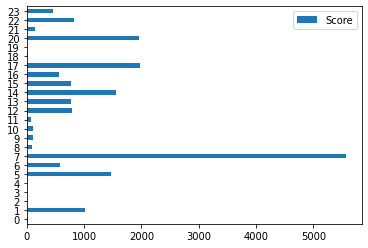

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 68.0603358246229
Test Prediction  68.22782970891656


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.12307101235832


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  78.74252459648898


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.58723877075754


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  64.99568338785896


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.05479388101277


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.87792725460886


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  26.419809650748693


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,5.115106
5,vnet,2.175336
1,inport,2.102066
9,current_hop,1.771484
4,flit_type,1.621131
23,vnet_vc_cc_index,1.454599
21,cache_coherence_vnet_index,0.839909
6,vc,0.769526
18,cache_coherence_flit_index,0.612375
17,port_index,-0.063785


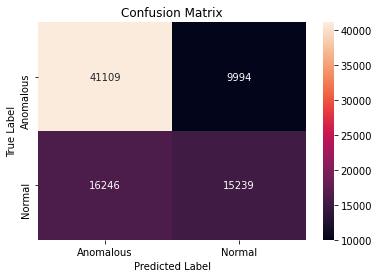

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76     51103
           1       0.60      0.48      0.54     31485

    accuracy                           0.68     82588
   macro avg       0.66      0.64      0.65     82588
weighted avg       0.67      0.68      0.67     82588



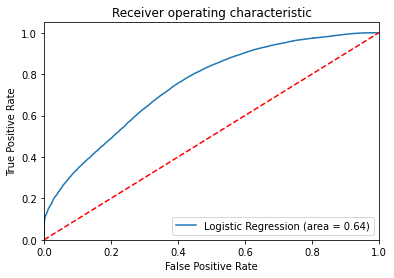

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

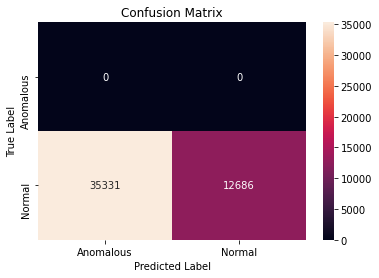

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.26      0.42     48017

    accuracy                           0.26     48017
   macro avg       0.50      0.13      0.21     48017
weighted avg       1.00      0.26      0.42     48017



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.38553841217372
Test Prediction  80.52380491112511


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  86.77722994173016


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.87608513921934


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.63745262484969


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  48.69479280261723


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.50389828662134


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  86.48791728948679


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  27.900535227107063


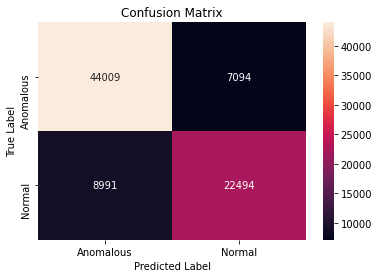

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     51103
           1       0.76      0.71      0.74     31485

    accuracy                           0.81     82588
   macro avg       0.80      0.79      0.79     82588
weighted avg       0.80      0.81      0.80     82588



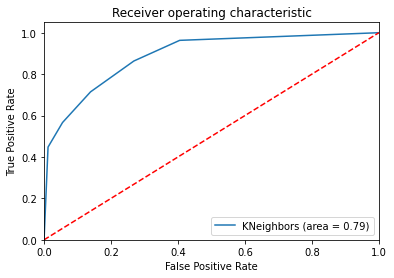

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

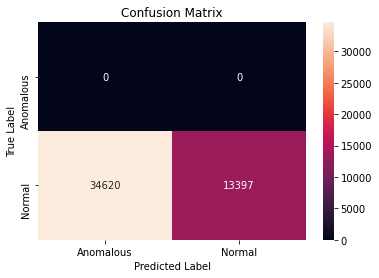

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.28      0.44     48017

    accuracy                           0.28     48017
   macro avg       0.50      0.14      0.22     48017
weighted avg       1.00      0.28      0.44     48017



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.36337108106227
Test Prediction Score 60.265413861577954


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 52.612537619261055


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  49.45501896984117


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.703983317858714


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  54.19052162849872


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.105681694393


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  53.24800697558545


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  56.58204385946644


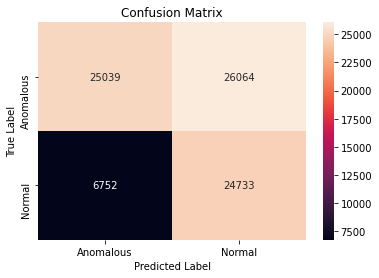

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.49      0.60     51103
           1       0.49      0.79      0.60     31485

    accuracy                           0.60     82588
   macro avg       0.64      0.64      0.60     82588
weighted avg       0.67      0.60      0.60     82588



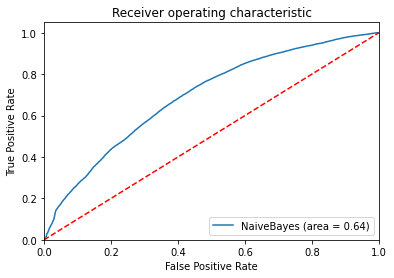

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 264280 samples, validate on 66071 samples
Epoch 1/10
264280/264280 [==============================] - 9s 34us/step - loss: 0.1992 - accuracy: 0.6798 - val_loss: 0.1914 - val_accuracy: 0.6899
Epoch 2/10
264280/264280 [==============================] - 9s 33us/step - loss: 0.1894 - accuracy: 0.6906 - val_loss: 0.1817 - val_accuracy: 0.6984
Epoch 3/10
264280/264280 [==============================] - 9s 33us/step - loss: 0.1786 - accuracy: 0.6979 - val_loss: 0.1758 - val_accuracy: 0.7013
Epoch 4/10
264280/264280 [==============================] - 9s 33us/step - loss: 0.1755 - accuracy: 0.7008 - val_loss: 0.1739 - val_accuracy: 0.7065
Epoch 5/10
264280/264280 [==============================] - 9s 33us/step - loss: 0.1743 - accuracy: 0.7017 - val_loss: 0.1729 - val_accuracy: 0.7066
Epoch 6/10
264280/264280 [==============================] - 9s 33us/step - loss: 0.1735 - accuracy: 0.7005 - val_loss: 0.1733 - val_accuracy: 0.7007
Epoch 7/10
264280/264280 [=============================

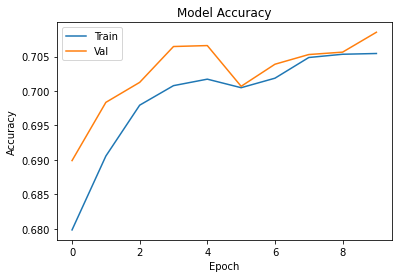

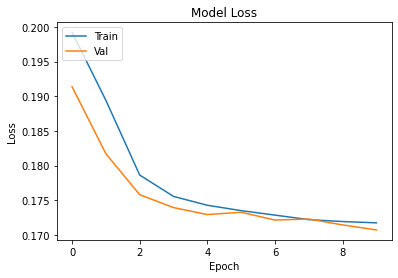

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.80%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.16%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.66%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.02%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.89%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.42%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.49%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 8.84%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 264280 samples, validate on 66071 samples
Epoch 1/30
264280/264280 [==============================] - 9s 34us/step - loss: 0.2274 - accuracy: 0.6208 - val_loss: 0.2108 - val_accuracy: 0.6620
Epoch 2/30
264280/264280 [==============================] - 9s 32us/step - loss: 0.2029 - accuracy: 0.6693 - val_loss: 0.1978 - val_accuracy: 0.6775
Epoch 3/30
264280/264280 [==============================] - 9s 32us/step - loss: 0.1954 - accuracy: 0.6766 - val_loss: 0.1914 - val_accuracy: 0.6846
Epoch 4/30
264280/264280 [==============================] - 9s 33us/step - loss: 0.1895 - accuracy: 0.6874 - val_loss: 0.1863 - val_accuracy: 0.6933
Epoch 5/30
264280/264280 [==============================] - 9s 32us/step - loss: 0.1846 - accuracy: 0.6936 - val_loss: 0.1815 - val_accuracy: 0.6961
Epoch 6/30
264280/264280 [==============================] - 9s 33us/step - loss: 0.1803 - accuracy: 0.6974 - val_loss: 0.1777 - val_accuracy: 0.7019
Epoch 7/30
264280/264280 [=============================

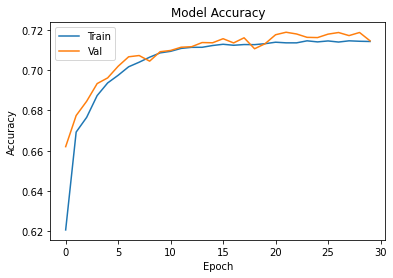

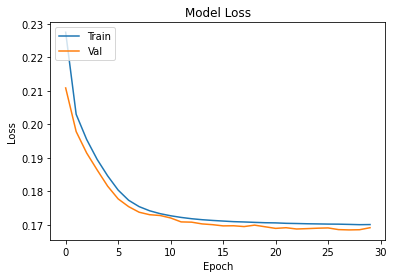

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.17%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.59%
accuracy: 70.83%
accuracy: 73.47%
accuracy: 60.90%
accuracy: 72.18%
accuracy: 78.79%
accuracy: 32.73%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 264280 samples, validate on 66071 samples
Epoch 1/30
264280/264280 [==============================] - 9s 34us/step - loss: 0.2373 - accuracy: 0.6131 - val_loss: 0.2360 - val_accuracy: 0.6178
Epoch 2/30
264280/264280 [==============================] - 9s 34us/step - loss: 0.2349 - accuracy: 0.6157 - val_loss: 0.2310 - val_accuracy: 0.6178
Epoch 3/30
264280/264280 [==============================] - 9s 34us/step - loss: 0.2211 - accuracy: 0.6523 - val_loss: 0.2087 - val_accuracy: 0.6706
Epoch 4/30
264280/264280 [==============================] - 9s 34us/step - loss: 0.2016 - accuracy: 0.6760 - val_loss: 0.1955 - val_accuracy: 0.6844
Epoch 5/30
264280/264280 [==============================] - 9s 35us/step - loss: 0.1939 - accuracy: 0.6846 - val_loss: 0.1913 - val_accuracy: 0.6887
Epoch 6/30
264280/264280 [==============================] - 9s 35us/step - loss: 0.1905 - accuracy: 0.6885 - val_loss: 0.1881 - val_accuracy: 0.6909
Epoch 7/30
264280/264280 [=============================

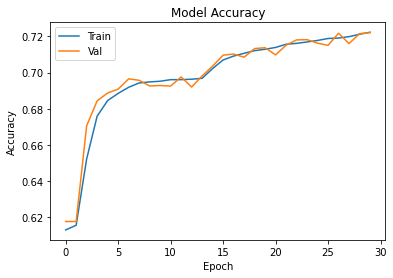

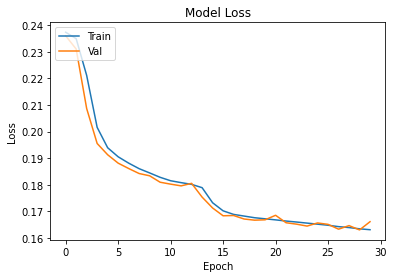

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.12%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.22%
accuracy: 66.28%
accuracy: 70.72%
accuracy: 50.07%
accuracy: 66.66%
accuracy: 72.43%
accuracy: 37.83%


5-Layer Neural Network Optimized

In [36]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 264280 samples, validate on 66071 samples
Epoch 1/100
264280/264280 [==============================] - 18s 70us/step - loss: 0.1718 - accuracy: 0.7049 - val_loss: 0.1583 - val_accuracy: 0.7234
Epoch 2/100
264280/264280 [==============================] - 18s 67us/step - loss: 0.1602 - accuracy: 0.7251 - val_loss: 0.1508 - val_accuracy: 0.7290
Epoch 3/100
264280/264280 [==============================] - 18s 69us/step - loss: 0.1558 - accuracy: 0.7325 - val_loss: 0.1489 - val_accuracy: 0.7406
Epoch 4/100
264280/264280 [==============================] - 18s 67us/step - loss: 0.1537 - accuracy: 0.7350 - val_loss: 0.1470 - val_accuracy: 0.7504
Epoch 5/100
264280/264280 [==============================] - 18s 66us/step - loss: 0.1522 - accuracy: 0.7378 - val_loss: 0.1488 - val_accuracy: 0.7387
Epoch 6/100
264280/264280 [==============================] - 17s 65us/step - loss: 0.1513 - accuracy: 0.7406 - val_loss: 0.1474 - val_accuracy: 0.7413
Epoch 7/100
264280/264280 [================

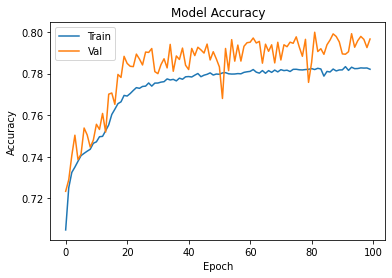

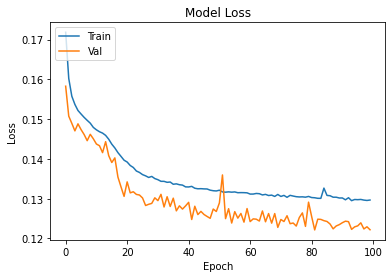

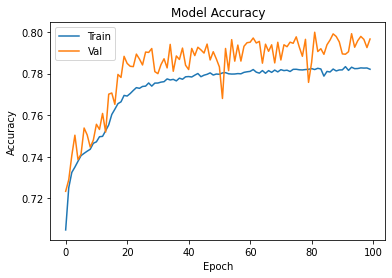

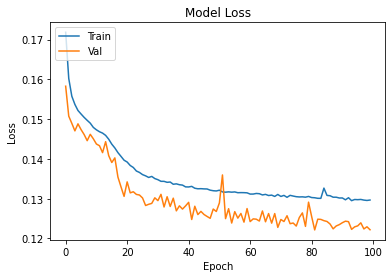

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [39]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.47%


In [40]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.76%
accuracy: 78.67%
accuracy: 82.72%
accuracy: 50.52%
accuracy: 79.24%
accuracy: 88.92%
accuracy: 24.43%


In [41]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 264280 samples, validate on 66071 samples
Epoch 1/50
264280/264280 [==============================] - 18s 69us/step - loss: 0.1765 - accuracy: 0.6992 - val_loss: 0.1644 - val_accuracy: 0.7200
Epoch 2/50
264280/264280 [==============================] - 18s 67us/step - loss: 0.1595 - accuracy: 0.7254 - val_loss: 0.1510 - val_accuracy: 0.7350
Epoch 3/50
264280/264280 [==============================] - 18s 69us/step - loss: 0.1540 - accuracy: 0.7353 - val_loss: 0.1483 - val_accuracy: 0.7305
Epoch 4/50
264280/264280 [==============================] - 18s 68us/step - loss: 0.1522 - accuracy: 0.7376 - val_loss: 0.1457 - val_accuracy: 0.7517
Epoch 5/50
264280/264280 [==============================] - 18s 68us/step - loss: 0.1513 - accuracy: 0.7388 - val_loss: 0.1457 - val_accuracy: 0.7525
Epoch 6/50
264280/264280 [==============================] - 18s 69us/step - loss: 0.1502 - accuracy: 0.7404 - val_loss: 0.1469 - val_accuracy: 0.7424
Epoch 7/50
264280/264280 [=======================

In [42]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.97%


In [43]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.47%
accuracy: 80.54%
accuracy: 83.70%
accuracy: 54.43%
accuracy: 80.41%
accuracy: 91.06%
accuracy: 26.41%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [47]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.4731512845428
Test Prediction Score 91.1791059233787


In [48]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 89.15124543766409
Test Prediction Score 77.49823162497589
Test Prediction Score 81.32391665017732
Test Prediction Score 61.535577971646674
Test Prediction Score 79.30251015421965
Test Prediction Score 87.80518186347783
Test Prediction Score 26.84465918320595


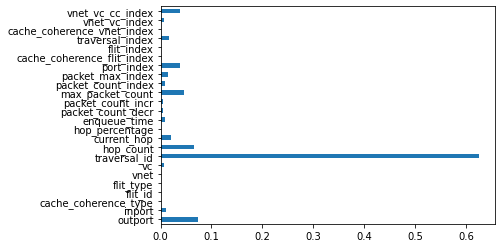

In [49]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

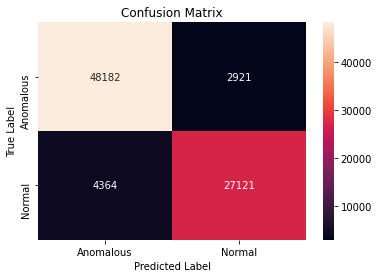

In [50]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     51103
           1       0.90      0.86      0.88     31485

    accuracy                           0.91     82588
   macro avg       0.91      0.90      0.91     82588
weighted avg       0.91      0.91      0.91     82588



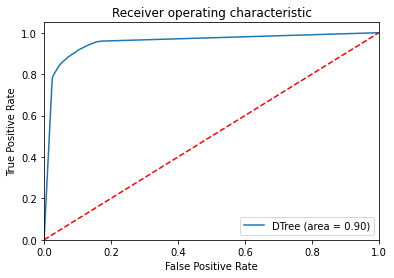

In [52]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [56]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.43515230769695
Test Prediction Score 92.45895287450962


In [57]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 90.23339950054428
Test Prediction Score 77.8213619702913
Test Prediction Score 83.23718778063594
Test Prediction Score 62.34551072337332
Test Prediction Score 82.49894956348527
Test Prediction Score 88.70671400099651
Test Prediction Score 25.57219318158152


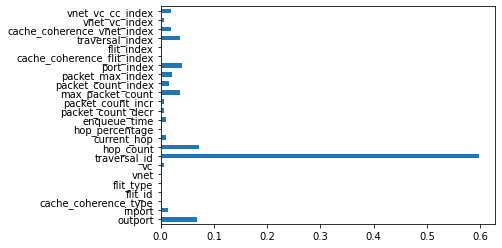

In [58]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

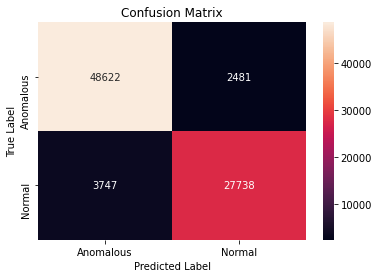

In [59]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     51103
           1       0.92      0.88      0.90     31485

    accuracy                           0.92     82588
   macro avg       0.92      0.92      0.92     82588
weighted avg       0.92      0.92      0.92     82588



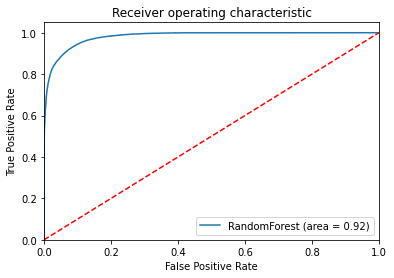

In [61]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [63]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [65]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.39942667042025
Test Prediction Score 95.523562745193


In [66]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.95005442786706
Test Prediction Score 76.99826377724905
Test Prediction Score 83.14281800331817
Test Prediction Score 62.1353598691385
Test Prediction Score 82.310649091956
Test Prediction Score 88.55256601893373
Test Prediction Score 24.00816377532957


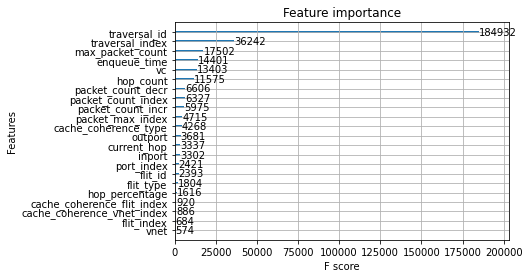

In [67]:
plot_importance(xgbc)
plt.show()

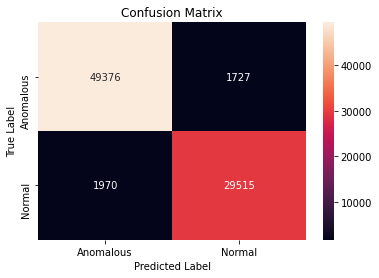

In [68]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [69]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     51103
           1       0.94      0.94      0.94     31485

    accuracy                           0.96     82588
   macro avg       0.95      0.95      0.95     82588
weighted avg       0.96      0.96      0.96     82588



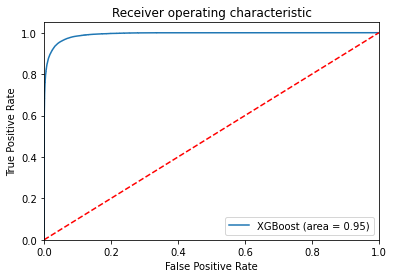

In [70]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [72]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [74]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.35209216863275
Test Prediction Score 85.3501719378118


In [75]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 88.87430364346545
Test Prediction Score 80.54626712108546
Test Prediction Score 83.96779250825736
Test Prediction Score 61.06870229007634
Test Prediction Score 80.95052833066185
Test Prediction Score 88.82504982561036
Test Prediction Score 24.491325988712333


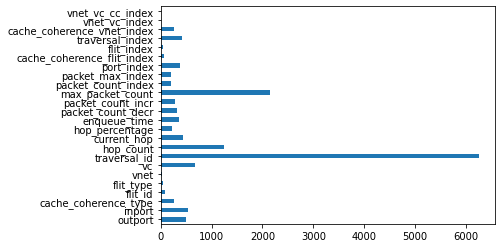

In [76]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

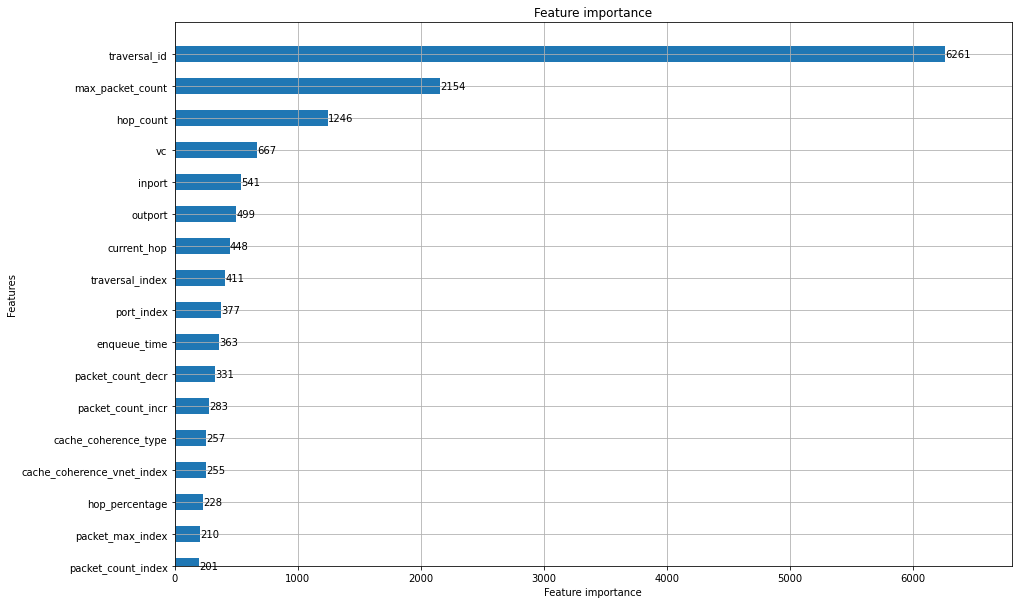

In [77]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [78]:
sorted(gbm.feature_importances_,reverse=True)

[6261,
 2154,
 1246,
 667,
 541,
 499,
 448,
 411,
 377,
 363,
 331,
 283,
 257,
 255,
 228,
 210,
 201,
 85,
 59,
 48,
 39,
 34,
 3,
 0]

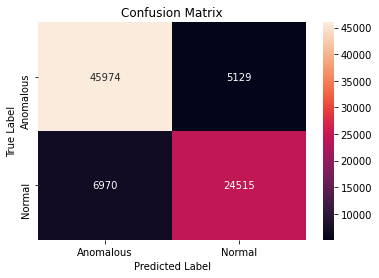

In [79]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [80]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     51103
           1       0.83      0.78      0.80     31485

    accuracy                           0.85     82588
   macro avg       0.85      0.84      0.84     82588
weighted avg       0.85      0.85      0.85     82588



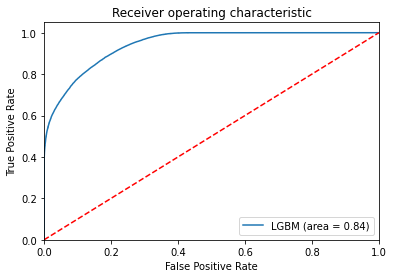

In [81]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()